In [1]:
import pandas as pd
import numpy as np

# seaborn可视化
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", style="darkgrid", 
        palette="deep", font="sans-serif", 
        font_scale=1, color_codes=True)

# 忽略警告
import warnings
warnings.filterwarnings("ignore")


In [3]:
rides = pd.read_csv('bike-sharing/hour.csv')
rides

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


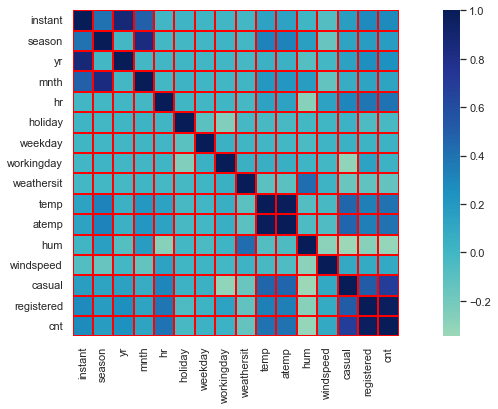

In [5]:
plt.figure(figsize=(16,6))

sns.heatmap(rides.corr(),
            cmap="YlGnBu",  # 色系
            square=True,  # 方形
            linewidths=.2,
            center=0,
            linecolor="red"  # 线条颜色
           )

plt.show()

In [44]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday'] #所有类型编码变量的名称
for each in dummy_fields:
    #取出所有类型变量，并将它们转变为独热编码
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    #将新的独热编码变量与原有的所有变量合并到一起
    rides = pd.concat([rides, dummies], axis=1)

#将原来的类型变量从数据表中删除
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 
    'hr'] #要删除的类型变量的名称
data = rides.drop(fields_to_drop, axis=1) #将它们从数据库的变量中删除

data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0.26,0.60,0.1642,11,108,119,1,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,0.26,0.60,0.1642,8,81,89,1,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,0.26,0.60,0.1642,7,83,90,1,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,0.26,0.56,0.1343,13,48,61,1,0,...,0,1,0,0,1,0,0,0,0,0


In [45]:
# 切分数据集的模块
from sklearn.model_selection import train_test_split
train,test = train_test_split(rides,test_size=0.05, random_state=10)
print(train.shape)
print(test.shape)

(16510, 156)
(869, 156)


In [48]:
# 切分数据集的模块
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.1, random_state=0)
print(train.shape)
print(test.shape)

(15641, 147)
(1738, 147)


In [49]:
from sklearn.preprocessing import MinMaxScaler
# 实例化对象
scaler  = MinMaxScaler()

# 部分字段的拟合
num_col = ['temp', 'hum', 'windspeed']
trans_1 = scaler.fit(train[num_col].to_numpy())

# 训练集转换
train.loc[:,num_col] = trans_1.transform(train[num_col].to_numpy())
# 测试集转换
test.loc[:,num_col] = trans_1.transform(test[num_col].to_numpy())

# 对标签cnt的归一化
cnt_scaler = MinMaxScaler()
# 数据拟合
trans_2 = cnt_scaler.fit(train[["cnt"]])
# 数据转化
train["cnt"] = trans_2.transform(train[["cnt"]])
test["cnt"] = trans_2.transform(test[["cnt"]])
train

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
8685,1,1,0.244898,0.35,0.456213,17,136,0.155738,1,0,...,0,0,0,0,1,0,0,0,0,0
12661,1,0,0.714286,0.37,0.263195,256,315,0.584016,0,1,...,0,0,0,0,0,0,0,0,0,1
1523,0,0,0.306122,0.39,0.105325,2,74,0.076844,1,0,...,0,0,0,0,0,1,0,0,0,0
16737,1,0,0.489796,0.63,0.526390,1,9,0.009221,0,0,...,0,0,0,0,0,0,1,0,0,0
15026,1,0,0.448980,0.59,0.263195,9,48,0.057377,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,0,0.224490,0.75,0.263195,14,243,0.262295,1,0,...,0,0,0,0,0,0,1,0,0,0
13123,1,0,0.775510,0.62,0.157870,39,63,0.103484,0,0,...,0,0,0,0,0,0,0,0,1,0
9845,1,1,0.224490,0.60,0.421065,0,6,0.005123,1,0,...,0,0,0,0,1,0,0,0,0,0
10799,1,0,0.408163,0.77,0.298225,14,55,0.069672,0,1,...,0,0,0,0,0,0,0,0,0,1


In [50]:

def prepare_data(X, y, time_steps=1):
    Xs = []
    Ys = []
    
    for i in range(len(X) - time_steps):
        a = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(a)
        Ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(Ys)

steps = 24

X_train, y_train = prepare_data(train, train.cnt, time_steps=steps)
X_test, y_test = prepare_data(test, test.cnt, time_steps=steps)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15617, 24, 147)
(1714, 24, 147)
(15617,)
(1714,)


In [51]:
# 1、导入需要的库
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import tensorflow as tf
model = Sequential()
model.add(Bidirectional(LSTM(128,input_shape=(X_train.shape[1],X_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid")) # 激活函数选择
model.compile(optimizer="adam",loss="mse")  # 优化器和损失函数选择

with tf.device('/GPU:0'):
    prepared_model = model.fit(X_train,
                               y_train,
                               batch_size=32,
                               epochs=100,
                               validation_data=[X_test,y_test])

Epoch 1/100


Exception ignored in: <function tqdm.__del__ at 0x0000020AC58F1948>
Traceback (most recent call last):
  File "c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\notebook.py", line 291, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000020AC58F1948>
Traceback (most recent call last):
  File "c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "c:\Users\gotobcn\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\notebook.py", line 291, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


489/489 [==============================] - 12s 21ms/step - loss: 0.0372 - val_loss: 0.0336
Epoch 2/100
489/489 [==============================] - 9s 19ms/step - loss: 0.0356 - val_loss: 0.0336
Epoch 3/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0351 - val_loss: 0.0337
Epoch 4/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0348 - val_loss: 0.0336
Epoch 5/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0348 - val_loss: 0.0335
Epoch 6/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0345 - val_loss: 0.0338
Epoch 7/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0344 - val_loss: 0.0340
Epoch 8/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0340 - val_loss: 0.0340
Epoch 9/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0336 - val_loss: 0.0344
Epoch 10/100
489/489 [==============================] - 10s 20ms/step - loss: 0.0331 -

54/54 [==============================] - 1s 8ms/step


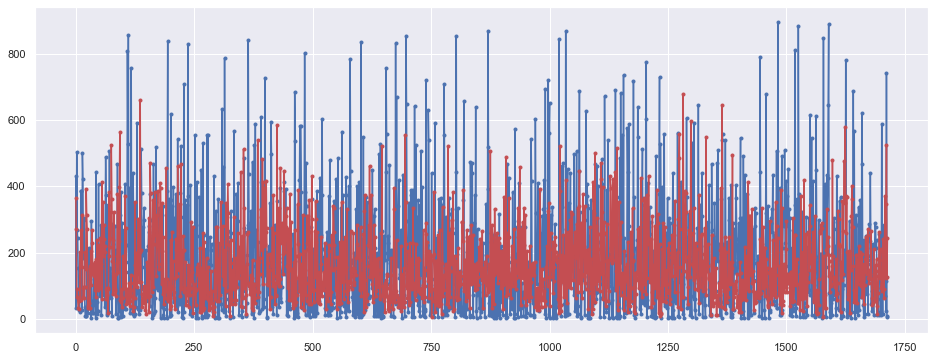

In [52]:
pred = model.predict(X_test)

y_test_inv = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
pred_inv = cnt_scaler.inverse_transform(pred)

plt.figure(figsize=(16,6))
plt.plot(y_test_inv.flatten(),marker=".",label="actual")
plt.plot(pred_inv.flatten(),marker=".",label="prediction",color="r")

In [53]:
y_test_actual = cnt_scaler.inverse_transform(y_test.reshape(-1,1))
y_test_pred = cnt_scaler.inverse_transform(pred)

arr_1 = np.array(y_test_actual)
arr_2 = np.array(y_test_pred)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [54]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,431.0,364.770294
1,33.0,271.616974
2,505.0,65.950462
3,267.0,88.747292
4,243.0,61.821011


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(final.actual,final.predicted)) 
r2 = r2_score(final.actual,final.predicted) 
print("rmse is : {}\nr2 is : {}".format(rmse,r2))

rmse is : 208.5038199408906
r2 is : -0.3612824210444514


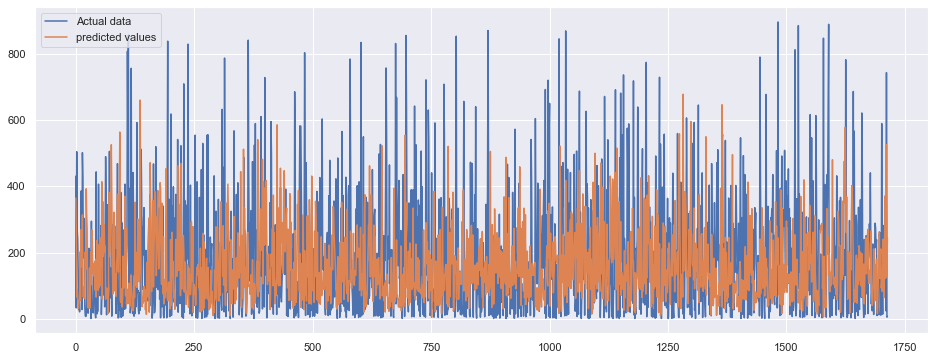

In [56]:
plt.figure(figsize=(16,6))
plt.plot(final.actual,label="Actual data")
plt.plot(final.predicted,label="predicted values")
plt.legend(loc="best")

In [63]:
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平方绝对误差
from sklearn.metrics import r2_score # R square
from sklearn.metrics import explained_variance_score

print('平均绝对误差:',mean_absolute_error(y_test_actual,y_test_pred))
print('均方误差:',mean_squared_error(y_test_actual,y_test_pred))
print('R方值(R2_score)',r2_score(y_test_actual,y_test_pred))
print('解释方差分',explained_variance_score(y_test_actual,y_test_pred))
print('均方根误差',rmse)

平均绝对误差: 156.4364906200311
均方误差: 43473.84292994333
R方值(R2_score) -0.3612824210444514
解释方差分 -0.34005172259841543
均方根误差 208.5038199408906
